# 🐟 Fish Weight Prediction Project (Google Colab)
This notebook demonstrates data preprocessing, exploratory data analysis (EDA), and linear regression model training for predicting fish weights.

In [1]:
# ✅ Step 1: Install required libraries
!pip install matplotlib seaborn scikit-learn pandas

In [2]:
# ✅ Step 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

In [3]:
# ✅ Step 3: Load and preprocess dataset
def load_and_preprocess_data():
    try:
        df = pd.read_csv('Fish.csv')
        print("Data loaded successfully from 'Fish.csv'")
    except FileNotFoundError:
        print("⚠️ 'Fish.csv' not found. Creating a sample dataset...")
        data = {
            'Species': ['Bream', 'Perch', 'Roach', 'Pike', 'Smelt', 'Whitefish'],
            'Weight': [242.0, 150.0, 115.0, 500.0, 6.7, 240.0],
            'Length1': [23.2, 23.0, 21.0, 40.0, 10.3, 23.6],
            'Length2': [25.4, 24.5, 22.5, 43.0, 10.9, 26.0],
            'Length3': [30.0, 26.5, 24.5, 45.5, 11.6, 28.0],
            'Height': [11.52, 7.82, 6.47, 10.15, 2.09, 9.68],
            'Width': [4.02, 3.54, 3.72, 6.05, 1.39, 4.47]
        }
        df = pd.DataFrame(data)

    print("\nInitial Data:")
    print(df.head())

    print("\nMissing values per column:")
    print(df.isnull().sum())

    df = pd.get_dummies(df, columns=['Species'], drop_first=True)

    print("\nProcessed Data with One-Hot Encoding:")
    print(df.head())

    return df

In [4]:
# ✅ Step 4: EDA
def perform_eda(df):
    print("\nPerforming Exploratory Data Analysis...")

    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f")
    plt.title('Correlation Matrix of Fish Features')
    plt.show()

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('Weight vs. Length for Different Measurements')

    sns.scatterplot(x='Length1', y='Weight', data=df, ax=axes[0])
    axes[0].set_title('Weight vs. Length1')

    sns.scatterplot(x='Length2', y='Weight', data=df, ax=axes[1])
    axes[1].set_title('Weight vs. Length2')

    sns.scatterplot(x='Length3', y='Weight', data=df, ax=axes[2])
    axes[2].set_title('Weight vs. Length3')

    plt.tight_layout()
    plt.show()

In [5]:
# ✅ Step 5: Train & evaluate model
def train_and_evaluate_model(df):
    print("\nTraining and evaluating the model...")

    X = df.drop('Weight', axis=1)
    y = df['Weight']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    print(f"Training data shape: {X_train.shape}")
    print(f"Testing data shape: {X_test.shape}")

    model = LinearRegression()
    model.fit(X_train, y_train)

    print("\nModel training complete.")

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\nModel Evaluation Metrics:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared (R2) Score: {r2:.2f}")

    plt.figure(figsize=(10, 6))
    sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha': 0.5})
    plt.title('Actual vs. Predicted Fish Weights')
    plt.xlabel('Actual Weight')
    plt.ylabel('Predicted Weight')
    plt.show()

⚠️ 'Fish.csv' not found. Creating a sample dataset...

Initial Data:
  Species  Weight  Length1  Length2  Length3  Height  Width
0   Bream   242.0     23.2     25.4     30.0   11.52   4.02
1   Perch   150.0     23.0     24.5     26.5    7.82   3.54
2   Roach   115.0     21.0     22.5     24.5    6.47   3.72
3    Pike   500.0     40.0     43.0     45.5   10.15   6.05
4   Smelt     6.7     10.3     10.9     11.6    2.09   1.39

Missing values per column:
Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

Processed Data with One-Hot Encoding:
   Weight  Length1  Length2  Length3  Height  Width  Species_Perch  \
0   242.0     23.2     25.4     30.0   11.52   4.02          False   
1   150.0     23.0     24.5     26.5    7.82   3.54           True   
2   115.0     21.0     22.5     24.5    6.47   3.72          False   
3   500.0     40.0     43.0     45.5   10.15   6.05          False   
4     6.7     10.3     10.9     11.6    2.09   1.3

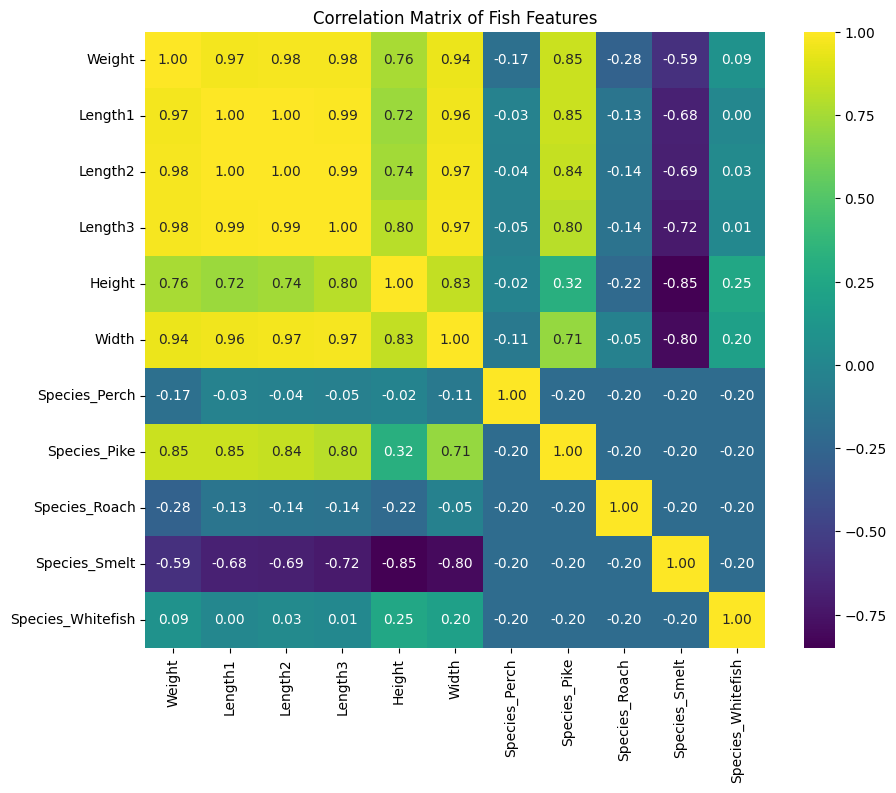

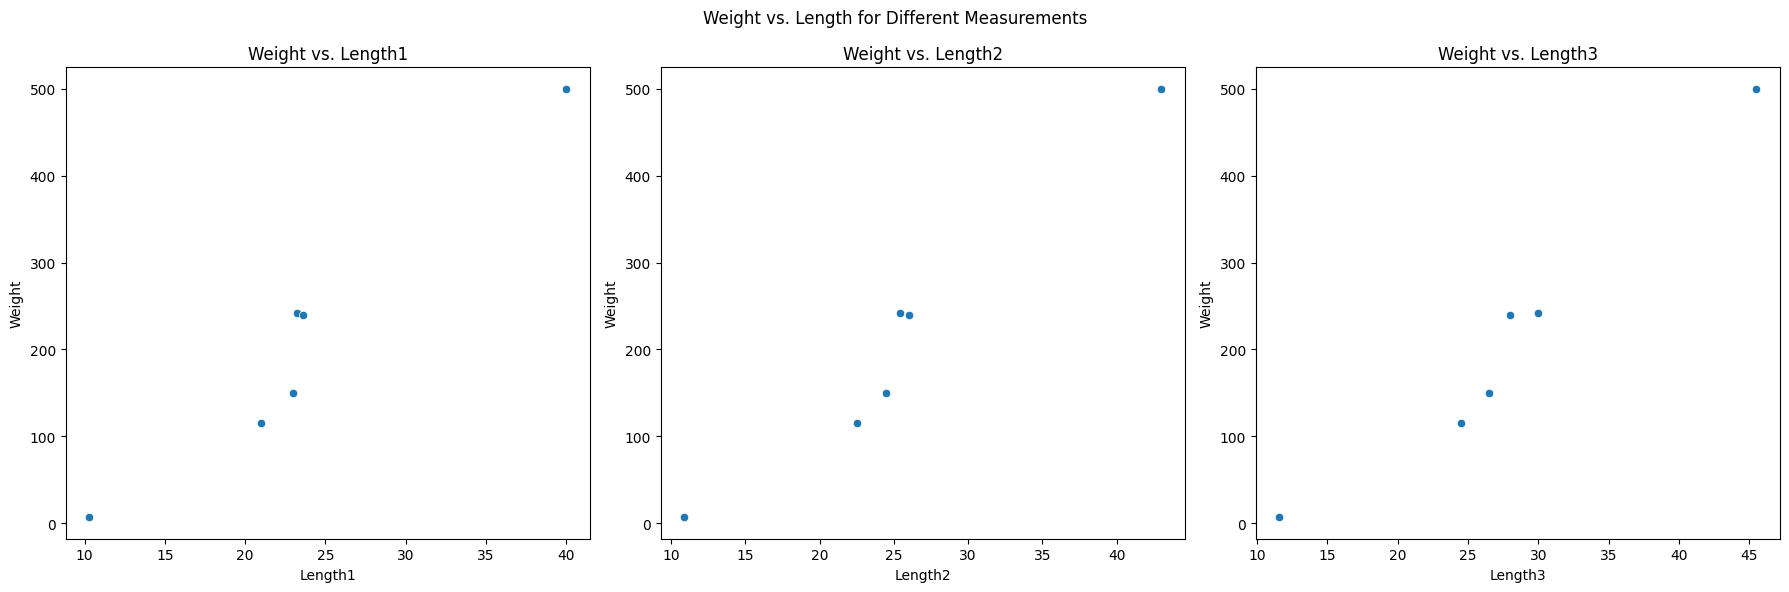


Training and evaluating the model...
Training data shape: (4, 10)
Testing data shape: (2, 10)

Model training complete.

Model Evaluation Metrics:
Mean Absolute Error (MAE): 42.25
R-squared (R2) Score: 0.08


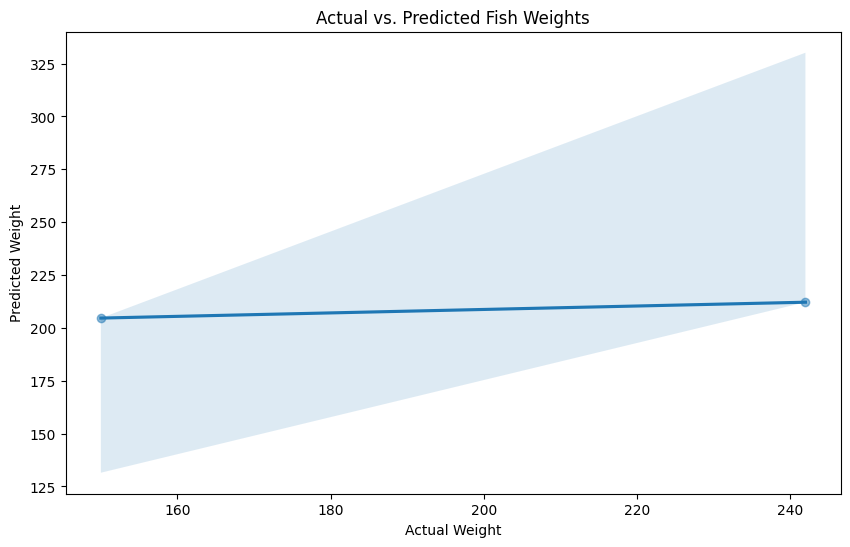

In [6]:
# ✅ Step 6: Run full workflow
fish_data = load_and_preprocess_data()
perform_eda(fish_data)
train_and_evaluate_model(fish_data)